# 1. Algorithm Analysis

https://runestone.academy/runestone/books/published/pythonds/index.html



Which one is better when more than 2 algorithms solve the same problem?

- How much space does an algorithm require?

- How much time does an  algorithm take?


we will compute the actual time required for the program to compute its result(benchmark analysis)


In [5]:
import time

def sumOfN_A(n):
    theSum = 0
    start = time.time()
    for i in range(1, n+1):
        theSum += i
    elapsed = time.time() - start
    return theSum, elapsed

for i in range(5):
    sums, elapsed = sumOfN_A(10000)
    print(f'{sums} takes {elapsed}s')

# takes 10 times more seconds 
for i in range(5):
    sums, elapsed = sumOfN_A(100000)
    print(f'{sums} takes {elapsed}s')


50005000 takes 0.0006971359252929688s
50005000 takes 0.0006759166717529297s
50005000 takes 0.0006320476531982422s
50005000 takes 0.0006277561187744141s
50005000 takes 0.0006368160247802734s
5000050000 takes 0.010951995849609375s
5000050000 takes 0.011186838150024414s
5000050000 takes 0.013097047805786133s
5000050000 takes 0.010185956954956055s
5000050000 takes 0.010711193084716797s


In [4]:
def sumOfN_B(n):
    start = time.time()
    theSum = n*(n+1)/2
    elapsed = time.time() - start
    return theSum, elapsed

for i in [10000, 100000, 1000000, 10000000, 100000000]:
    sums, elapsed = sumOfN_B(i)
    print(f'{i} takes {elapsed}s')


10000 takes 1.1920928955078125e-06s
100000 takes 1.9073486328125e-06s
1000000 takes 9.5367431640625e-07s
10000000 takes 0.0s
100000000 takes 2.1457672119140625e-06s


What's the difference ?

- it takes much less time

- the time consumed are very consistent.



# 2. Big O


We want to calculate the execution time independent of the machines, compilers or programming languages. One way to quantify the efficiency of an algorithm is to **quantify the number of operations that the algorighm require**. Each of these operations is considered to be a unit of computation. For example, it can be simply an assignment operation. In the previous example `sumOfN()`, the number of operations is denoted by $T(n) = n + 1$.

Then we want to know how the algorithm's execution time change with respect to the size of the problem. Some part of the $T(n)$ tends to overpower than the rest as the size of problem increases. The dominant term is used for comparion. The **order of magnitude** function describes the part of $T(n)$ that increases the fastest as $n$ increases, which is denoted by **Big-O** and written as $O(f(n))$. The $f(n)$ provides a simple approximation to the original $T(n)$. In the previous example, the size is $n$. When n is larger, the constant 1 becomes less important and we can simply say that the running time is $O(n)$.


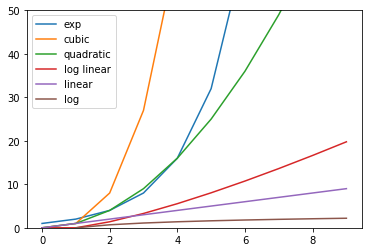

In [6]:
import numpy as np
import matplotlib.pyplot as plt
eps = 1e-7
def expon(n):
    return 2**n

def cubic(n):
    return n**3

def quadratic(n):
    return n**2

def loglinear(n):
    return n*np.log(n+eps)

def linear(n):
    return n

def loga(n):
    return np.log(n+eps)


x = np.array(range(0, 10))
y_list = [expon(x), cubic(x), quadratic(x), loglinear(x), linear(x), loga(x)]
o_names = ['exp', 'cubic', 'quadratic', 'log linear', 'linear', 'log']

fig,ax=plt.subplots()
for i, y in enumerate(y_list):
    ax.plot(x, y, label=o_names[i])
ax.set_ylim(0, 50)
plt.legend()


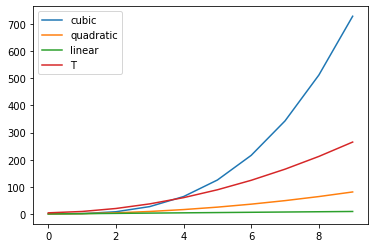

In [7]:
x = np.array(range(0, 10))
y_list = [cubic(x), quadratic(x), linear(x), 3*x**2+2*x+4]
o_names = ['cubic', 'quadratic', 'linear', 'T']

fig,ax=plt.subplots()
for i, y in enumerate(y_list):
    ax.plot(x, y, label=o_names[i])
plt.legend()


# 3. Sort

## Bubble Sort

**under the hood**

- each pass, we place the highest value in the rightmost place

- so, there are `n - 1` passes in total

- for the ith pass, there are `n - i` items left to sort, we need to compare `n - i - 1` pairs of elements

**Complexity**

Since `(1th, n - 1), (2th, n-2), ... (n-1, 1)`, we have 

$$
O(n)=n^2
$$

**Stability**
- Yes


In [9]:
def bubbleSort(nums):
    n = len(nums)

    for i in range(n - 1): # loop passes
        for j in range(n - i - 1):
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]

    return nums        


In [10]:
bubbleSort([54,26,93,17,77,31,44,55,20])


[17, 20, 26, 31, 44, 54, 55, 77, 93]

## Selection Sort

**Idea**
- Similar to Bubble Sort, but selection sort look for the largest value directly and then place it on the rightmost position

- each pass, we place the highest value in the rightmost place

- so, there are `n - 1` passes in total

- for the `ith` pass, we find the largest value among `n-i` elements



**Complexity**

- $O(n^2)$


**Stability**
- No


In [33]:
def selectionSort(nums):
    n = len(nums)

    for i in range(n - 1): # loop passes
        max_index = 0
        for j in range(1, n - i):
            if nums[j] > nums[max_index]:
                max_index = j

        nums[n-i-1], nums[max_index] = nums[max_index], nums[n-i-1]

    return nums


In [34]:
alist = [54,26,93,17,77,31,44,55,20]

selectionSort(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]

## Insertion Sort

**Idea**

- loop from the item 1 to item n - 1

- each loop, we look for the right position to insert so as to maintain the sublist sorted

**Complexity**

- the worsest case $O(n^2)$

- the best case $O(n)$


**Stability**

- Yea



In [42]:
"""
insert sort
"""
def insertionSort(nums):
    n = len(nums)

    for i in range(1, n):
        # a sorted sublist in each loop
        # so, as long as the current value is greater than any of them, the while loop will stop instantly
        cur_elem = nums[i]
        cur_index = i
        
        while cur_index > 0 and cur_elem < nums[cur_index - 1]:
            nums[cur_index] = nums[cur_index - 1]
            cur_index -= 1
        
        # insert the current value into the right position
        nums[cur_index] = cur_elem
    
    return nums


In [43]:
alist = [54,26,93,17,77,31,44,55,20]

insertionSort(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]

## Quick Sort

**Idea**

- partition at some value(pivot value), 
    - the left part are elements that smaller than this value, 
    - the right part are elements that greater than this value, 


- divide and conquer


- select a value(many ways to do this) as pivot value
    - first item
    - the rightmost value

- spicify a left pointer and right pointer that point to the beginning and end of the remaining array respectively


- for the left pointer, 
    - if the pointed element is smaller than the pivot value, move the pointer to the right
    - otherwise, it stops here

- for the right pointer, 
    - if the pointed element is greater than the pivot value, move the pointer to the left
    - otherwise, it stops here



**Complexity**

**Stablity**
- No


In [75]:
def quickSort(nums, first_index, last_index):
    '''
    first_index, last_index, the index of each placeholder of the list `nums`
    
    for example: [ 3, 5, 2, 6(pivot), 10, 8, ]
     - left sublist [3, 5, 2] the first_index=0, last_index=2
     - right sublist [10, 8] the first_index=4, last_index=5
    '''
    pivot = nums[first_index]

    left_pointer = first_index + 1
    right_pointer = last_index
    
    loop = True
    while loop:
        while right_pointer >=left_pointer and nums[left_pointer] <= pivot:
            left_pointer += 1

        # eg. sublist, [17, 26, 20]
        while right_pointer >=left_pointer and nums[right_pointer] >= pivot:
            right_pointer -= 1

        if left_pointer < right_pointer: # swap
            nums[left_pointer], nums[right_pointer] = nums[right_pointer], nums[left_pointer]
        
        else:
            nums[right_pointer], nums[first_index] = nums[first_index], nums[right_pointer]
            loop = False

    return right_pointer

def quickSortRe(arr, start, end):
    if start < end:
        right_pointer = quickSort(arr, start, end)

        quickSortRe(arr, start, right_pointer-1)
        
        quickSortRe(arr, right_pointer+1, end)
    

In [76]:
alist = [54,26,93,17,77,31,44,55,20]

quickSortRe(alist, 0, len(alist) - 1)

alist


[17, 20, 26, 31, 44, 54, 55, 77, 93]

# 4. Searching

## Sequential Search

**Complexity**

1) item is in the list

- best case: 1

- worst case: n

- average case: $\frac{n}{2}$

2) item is not in the list
- best case: n

- worst case: n

- average case: n


In short, $O(n)$


In [12]:
def seq_search(arr, val):
    idx = -1
    for (i, e) in enumerate(arr):
        if val == e:
            idx = i
            break
    return idx


In [13]:
seq_search([15, 18, 2, 19, 18, 0, 8, 14, 19, 14], 18)


1

## Sorted Sequential Search


**Complexity**

1) item is in the list

- best case: 1

- worst case: n

- average case: $\frac{n}{2}$

2) item is not in the list

- best case: 1

- worst case: n

- average case: $\frac{n}{2}$


In [15]:
def sorted_seq_search(arr, val):
    idx = -1
  
    for (i, e) in enumerate(arr):
        if e == val:
            idx = i
            break
        
        if e > val:
            break

    return idx


In [21]:
sorted_seq_search([3, 5, 6, 8, 11, 12, 14, 15, 17, 18], 0)


-1

## Binary Search

divide and conquer

**Complexity**

each time there are $\frac{n}{2^i}$ elements left, so the times we search is $i = log_2 n$


In [25]:
def binary_search(arr, val):
    if len(arr) == 0:
        return False
    
    start = 0
    end = len(arr) - 1
    midpoint = (start + end) // 2
 
    if val == arr[midpoint]:
        return True

    if val < arr[midpoint]:
        return binary_search(arr[:midpoint], val)
    else:
        return binary_search(arr[midpoint+1:], val)
    

In [29]:
binary_search([0, 1, 2, 8, 13, 17, 19, 32, 42,], 13)

True

## Hash

# 5. Tree

## Binary Tree

In [1]:
class BinaryTree:
    def __init__(self, root_value):
        self.root = root_value
        self.left = None
        self.right = None
    
    
    def getRootVal(self):
        return self.root
    
    
    def insertLeft(self, node):
        if self.left is None:
            self.left = node
        else:
            node.left = self.left
            self.left = node

    def insertRight(self, node):
        if self.right is None:
            self.right = node
        else:
            node.right = self.right
            self.right = node

    def getLeft(self):
        return self.left

    
    def getRight(self):
        return self.right
    


In [3]:
tree = BinaryTree('a')

tree.insertLeft(BinaryTree('b'))
tree.insertRight(BinaryTree('c'))


tree.getLeft().insertRight(BinaryTree('d'))

tree.getRight().insertLeft(BinaryTree('e'))
tree.getRight().insertRight(BinaryTree('f'))


In [10]:
tree.getLeft().getRight().getRootVal()

'd'

## Balanced Binary Tree

# 6. Recursion